In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

In [52]:
blob = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', names=cols)

In [51]:
cols = ['date','time','resource','number1','number2','ip_source']

In [53]:
blob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399195 entries, 0 to 399194
Data columns (total 6 columns):
date         399195 non-null object
time         399195 non-null object
resource     399195 non-null object
number1      399195 non-null int64
number2      372441 non-null float64
ip_source    399195 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 18.3+ MB


In [56]:
#Cleaning up the time data. 
Date = blob['date'] + ' ' + blob['time']

Date = pd.to_datetime(Date)

blob['Date'] = Date

blob.drop(['date','time'],axis=1,inplace=True)

In [23]:
len(blob.number2)

399195

In [57]:
#I think it's ready to go!
df = blob.set_index('Date')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 4 columns):
resource     399195 non-null object
number1      399195 non-null int64
number2      372441 non-null float64
ip-source    399195 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 15.2+ MB


In [33]:
#Gonna drop nulls. Maybe I shouldnt?
# df = df.dropna()

In [34]:
# df.number2 = df.number2.astype('int')

In [43]:
df.number2.nunique()

31

In [44]:
df.number1.nunique()

543

In [42]:
df.resource.nunique()

1641

In [59]:
df.ip_source.nunique()

2585

# Lets find the normal, so we can see what's an anomaly

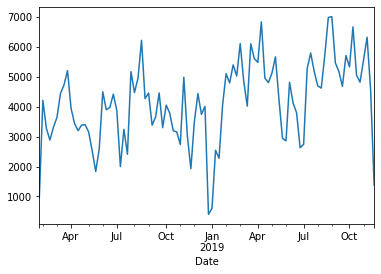

In [92]:
#The traffic on a weekly basis
df.resample('W')['ip_source'].count().plot()

In [96]:
#Each week has about 4158 hits per week
df.resample('W')['ip_source'].count().mean()

4158.28125

In [83]:
#The top ten most common clients' IP address
df.groupby('ip_source').count().sort_values('resource',ascending=False).head(12)

,resource,number1,number2
ip_source,,,
97.105.19.58,227220,227220,211289
97.105.19.61,61662,61662,60530
192.171.117.210,8127,8127,7791
70.122.40.62,1338,1338,1338
66.69.108.117,1199,1199,1199
173.174.211.206,1019,1019,1019
108.65.244.91,1007,1007,1007
170.248.173.245,997,997,952
67.11.157.190,972,972,968


In [81]:
clients = df.ip_source

local traffic = clients[clients == '97.105.19.58']

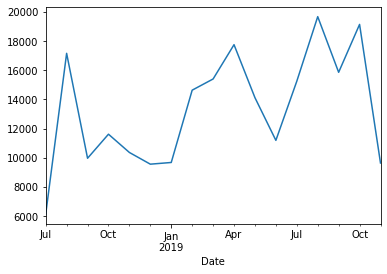

In [87]:
mvp.resample('M').count().plot()

In [100]:
df.number2.head()

Date
2018-01-26 09:55:03     8.0
2018-01-26 09:56:02     8.0
2018-01-26 09:56:05     8.0
2018-01-26 09:56:06     8.0
2018-01-26 09:56:24    22.0
Name: number2, dtype: float64

In [ ]:
df.groupby('number2').count()

In [103]:
df.groupby('number2')[['ip_source']].count()

,ip_source
number2,
1.0,8877
2.0,93
4.0,4
6.0,72
7.0,461
8.0,1671
9.0,5
11.0,204
12.0,270


In [107]:
first_cohort = df[df.number2 == 1]
last_cohort = df[df.number2 == 51]

In [105]:
first_cohort

,resource,number1,number2,ip_source
Date,,,,
2018-01-26 10:14:47,/,11,1.0,97.105.19.61
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61
2018-01-26 10:15:02,javascript-i/functions,11,1.0,97.105.19.61
2018-01-26 11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61
2018-01-26 11:46:39,appendix,11,1.0,97.105.19.61
2018-01-26 11:46:47,appendix/further-reading/javascript/hoisting,11,1.0,97.105.19.61
2018-01-26 11:47:01,appendix/capstone-workbook,11,1.0,97.105.19.61
2018-01-26 11:47:03,javascript-i,11,1.0,97.105.19.61
2018-01-26 11:47:05,javascript-i/functions,11,1.0,97.105.19.61


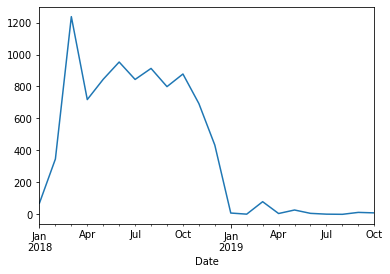

In [109]:
first_cohort.resample('M')['ip_source'].count().plot()

In [111]:
last_cohort

,resource,number1,number2,ip_source
Date,,,,
2019-11-04 16:03:34,/,516,52.0,97.105.19.58
2019-11-04 16:03:35,/,517,52.0,97.105.19.58
2019-11-04 16:03:35,/,518,52.0,97.105.19.58
2019-11-04 16:03:35,/,519,52.0,97.105.19.58
2019-11-04 16:03:35,/,520,52.0,97.105.19.58
2019-11-04 16:03:35,/,521,52.0,97.105.19.58
2019-11-04 16:03:36,/,522,52.0,97.105.19.58
2019-11-04 16:03:36,/,523,52.0,97.105.19.58
2019-11-04 16:03:37,/,524,52.0,97.105.19.58


## Maybe Bayes?

In [112]:
bayes = df[df.number2 == 34]

In [159]:
bayes

,resource,number1,number2,ip_source
Date,,,,
2019-08-20 09:39:58,/,466,34.0,97.105.19.58
2019-08-20 09:39:59,/,467,34.0,97.105.19.58
2019-08-20 09:39:59,/,468,34.0,97.105.19.58
2019-08-20 09:40:02,/,469,34.0,97.105.19.58
2019-08-20 09:40:08,/,470,34.0,97.105.19.58
2019-08-20 09:40:15,/,471,34.0,97.105.19.58
2019-08-20 09:40:15,/,472,34.0,97.105.19.58
2019-08-20 09:40:17,/,473,34.0,97.105.19.58
2019-08-20 09:40:18,/,474,34.0,97.105.19.58


In [158]:
bayes['2019-09-02 17:00:00':'2019-09-03 00:00:00']

,resource,number1,number2,ip_source
Date,,,,
2019-09-02 17:01:13,/,483,34.0,96.8.151.49
2019-09-02 17:25:59,3-sql/8-group-by,470,34.0,66.69.81.250
2019-09-02 17:26:12,3-sql/9.2-indexes,470,34.0,66.69.81.250
2019-09-02 17:26:24,3-sql/9.3-joins,470,34.0,66.69.81.250
2019-09-02 17:26:39,3-sql/9.4-subqueries,470,34.0,66.69.81.250
2019-09-02 17:26:53,3-sql/10-temporary-tables,470,34.0,66.69.81.250
2019-09-02 17:27:08,3-sql/11-more-exercises,470,34.0,66.69.81.250
2019-09-02 17:27:20,3-sql/8-group-by,470,34.0,66.69.81.250
2019-09-02 17:48:21,appendix/cli/7-more-topics,478,34.0,172.8.173.224


In [135]:
public_IPs = bayes[bayes.ip_source != '97.105.19.58']

In [138]:
public_IPs['2019-08-31':'2019-09-01']

,resource,number1,number2,ip_source
Date,,,,
2019-08-29 19:19:01,/,476,34.0,136.50.49.145
2019-08-29 19:19:12,2-storytelling/1-overview,476,34.0,136.50.49.145
2019-08-29 19:19:15,2-storytelling/project,476,34.0,136.50.49.145
2019-08-29 21:02:25,/,482,34.0,172.124.64.127
2019-08-29 21:02:29,2-storytelling/2.4-present,482,34.0,172.124.64.127
2019-08-29 21:11:21,2-storytelling/project,480,34.0,75.1.166.163
2019-08-29 21:18:59,2-storytelling/2.4-present,468,34.0,136.50.54.2
2019-08-29 21:30:45,2-storytelling/bad-charts,470,34.0,66.69.81.250
2019-08-29 21:30:46,2-storytelling/misleading1_fox.jpg,470,34.0,66.69.81.250


In [151]:
public_IPs['2019-09-02'].number1.unique()

array(['172.8.173.224', '67.10.174.4', '66.69.81.250', '75.1.166.163',
       '67.11.115.125', '70.226.109.182', '96.8.151.49', '71.78.109.210'],
      dtype=object)

In [116]:
bayes.number1.nunique()

22

In [149]:
#bayes.groupby('number1')['resource'].count()
# bayes.pivot_table(values = 'resource', index='number1', columns='ip_source')

In [126]:
sean = df[df.number1 == 358]

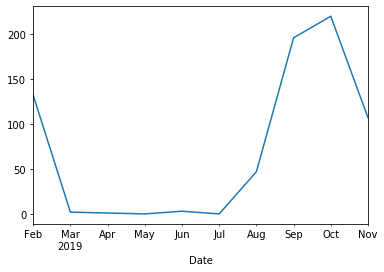

In [127]:
sean.resample('M')['ip_source'].count().plot()

In [185]:
IP_DF = pd.read_csv('/Users/fredricklambuth/Downloads/GEOs', header=None)

In [184]:
geoDF = pd.read_csv('/Users/fredricklambuth/Downloads/IPs', header=None)

In [186]:
geoDF['IP'] = IP_DF[0]

In [189]:
geoDF = geoDF.rename(columns={0: "State", 1: "City", 2: "Org"})

In [219]:
geoDF.City = geoDF.City.str.strip("'")

In [220]:
geoDF

,State,City,Org,IP
0,Texas,'San Antonio,'Codeup LLC,97.105.19.61
1,Texas,'San Antonio,'AT&amp;T Corp.,71.137.146.71
2,Texas,'Dallas,'Servers.com Inc.,209.205.123.242
3,Texas,'San Antonio,'Aethernet LLC,192.171.117.210
4,California,'San Francisco,'AT&amp;T Services Inc.,12.189.101.90
5,Texas,'Dallas,'Catalyst Host,104.193.225.250
6,Texas,'San Antonio,'AT&amp;T Internet Services,12.247.3.42
7,Oklahoma,'Guymon,'Verizon Wireless,174.207.5.52
8,Texas,'San Antonio,'AT&amp;T Corp.,172.3.220.202
9,Texas,'San Antonio,'AT&amp;T Mobility LLC,107.77.100.125
